In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### 3. Selección de Variables

In [3]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")

In [4]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,0.454545,0.25,0.000000,0.048433,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272727,0.666667,0.00
1,1.000000,0.75,0.446189,0.376434,1.0,1.0,0.333333,0.333333,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,0.666667,0.75
2,1.000000,0.75,0.592175,0.449140,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,1.000000,1.00
3,0.818182,0.75,0.534524,0.408828,1.0,1.0,0.333333,1.000000,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.00
4,0.727273,0.75,0.657279,0.417839,1.0,1.0,0.333333,0.333333,1.0,0.25,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.666667,0.75


In [8]:
y_train = pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test = pd.read_csv("preprocess_data/prep_ytest.csv")

y_train.head()

,SalePrice
0,11.424094
1,12.225875
2,13.091904
3,12.384219
4,12.083905


In [9]:
#objeto selector de variables
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [10]:
sel_.get_support().sum()

38

In [11]:
sel_.get_support()

array([ True,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True])

In [12]:
selected_features = X_train.columns[(sel_.get_support())]

In [14]:
selected_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
pd.Series(selected_features).to_csv('preprocess_data/selected_features.csv', index=False)

### 4. Entrenamiento del Modelo

In [18]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [20]:
#AQUIIIII VA EL MODELOOOO
linear_model = Lasso(alpha=0.001, random_state=2022)

linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

#### Predicciones

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
preds_train = linear_model.predict(X_train)

In [33]:
#Resultados del Train
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 824796417.1246818
RMSE de Entrenamiento: 28719.269091059436
R2 de Entrenamiento: 0.8706117742176254


In [34]:
preds_test = linear_model.predict(X_test)

In [35]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

MSE de Entrenamiento: 724284468.5495145
RMSE de Entrenamiento: 26912.533670197507
R2 de Entrenamiento: 0.8777064345534601


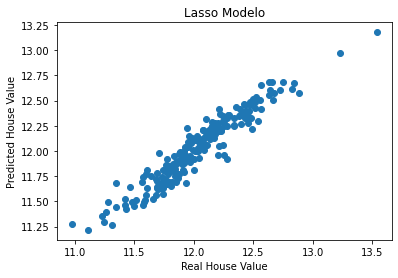

In [38]:
plt.scatter(y_test, preds_test)
plt.xlabel("Real House Value")
plt.ylabel("Predicted House Value")
plt.title("Lasso Modelo")
plt.show()

In [40]:
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features
importance.sort_values(inplace=True, ascending=False)

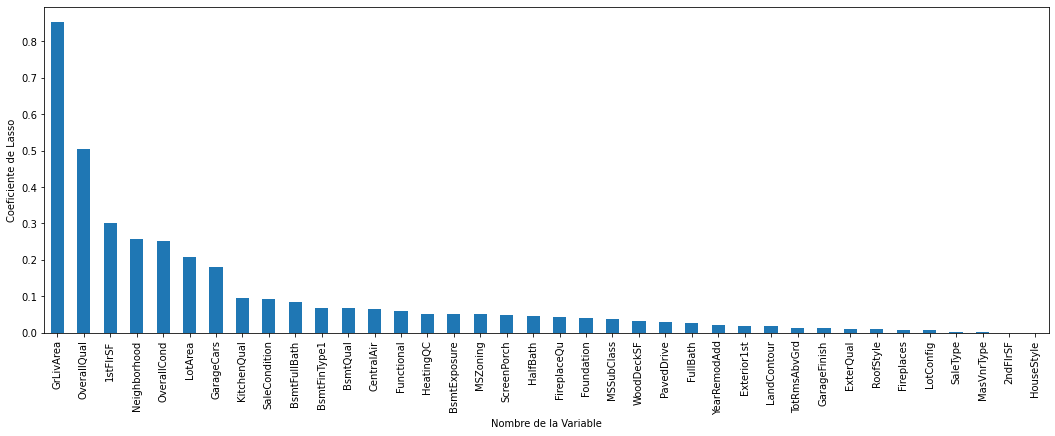

In [42]:
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la Variable")
plt.show()

In [43]:
import joblib

In [44]:
joblib.dump(linear_model, 'final_model/lasso_reg.joblib')

['final_model/lasso_reg.joblib']